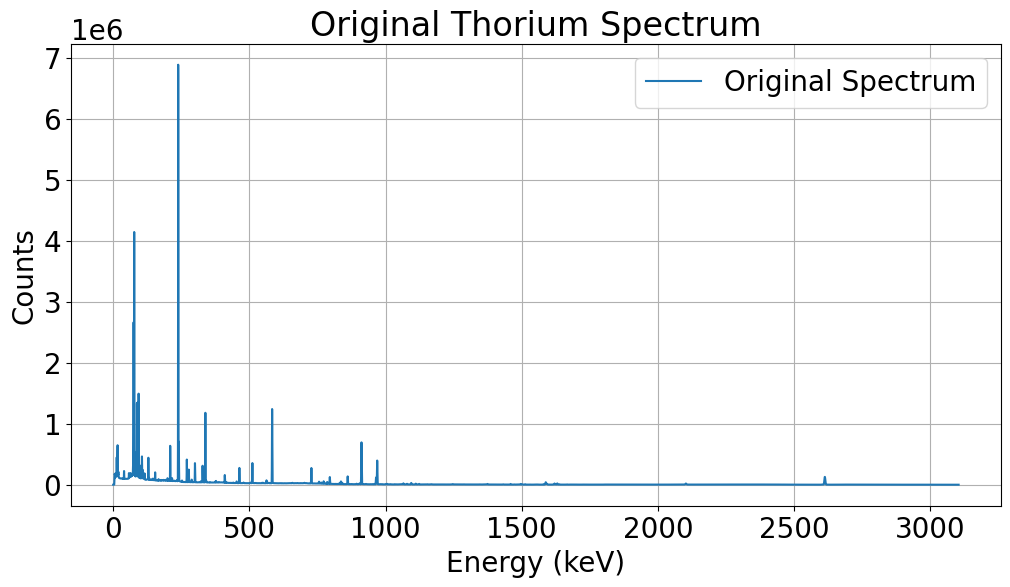

In [109]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

font = {'size':20}
mpl.rc('font', **font)

# Load the original spectrum data
spectrum_data = pd.read_csv('spectrum.RPT')

# Plot the original spectrum
plt.figure(figsize=(12, 6))
plt.plot(spectrum_data['Energy(keV)'], spectrum_data['Counts'], label='Original Spectrum')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.title('Original Thorium Spectrum')
plt.legend()
plt.grid(True)
plt.show()


In [110]:
len(spectrum_data)

16384

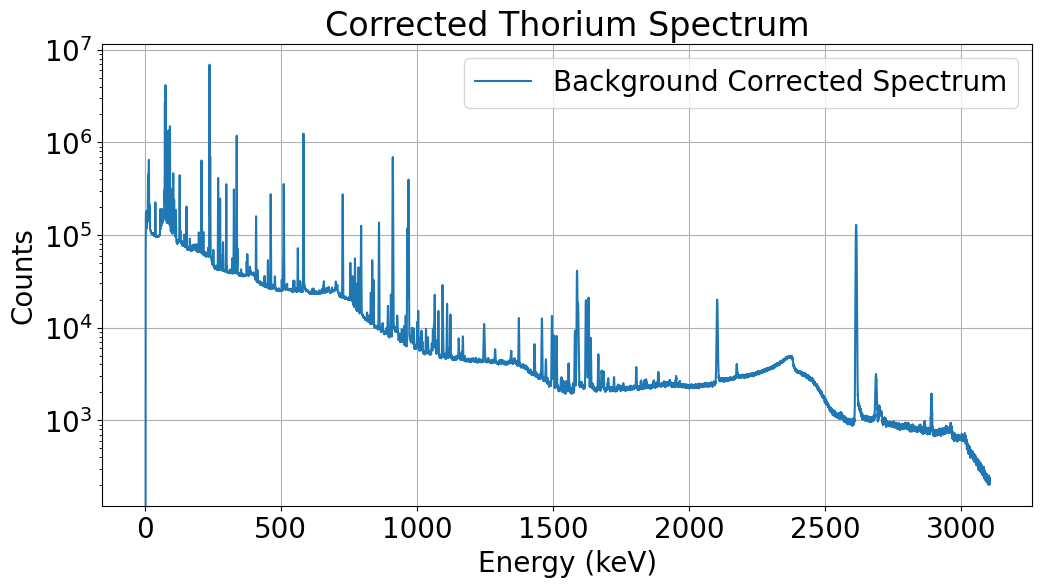

In [111]:

# Load the background spectrum data
background_data = pd.read_csv('2d_bkg.csv')

# Scale the background spectrum counts to match the original spectrum's time frame
background_data['ScaledCounts'] = background_data['Counts'] / 2

# Subtract the scaled background spectrum from the original spectrum
spectrum_data['CorrectedCounts'] = spectrum_data['Counts'] - background_data['ScaledCounts']

# Plot the corrected spectrum
plt.figure(figsize=(12, 6))
plt.plot(spectrum_data['Energy(keV)'], spectrum_data['CorrectedCounts'], label='Background Corrected Spectrum')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.title('Corrected Thorium Spectrum')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()


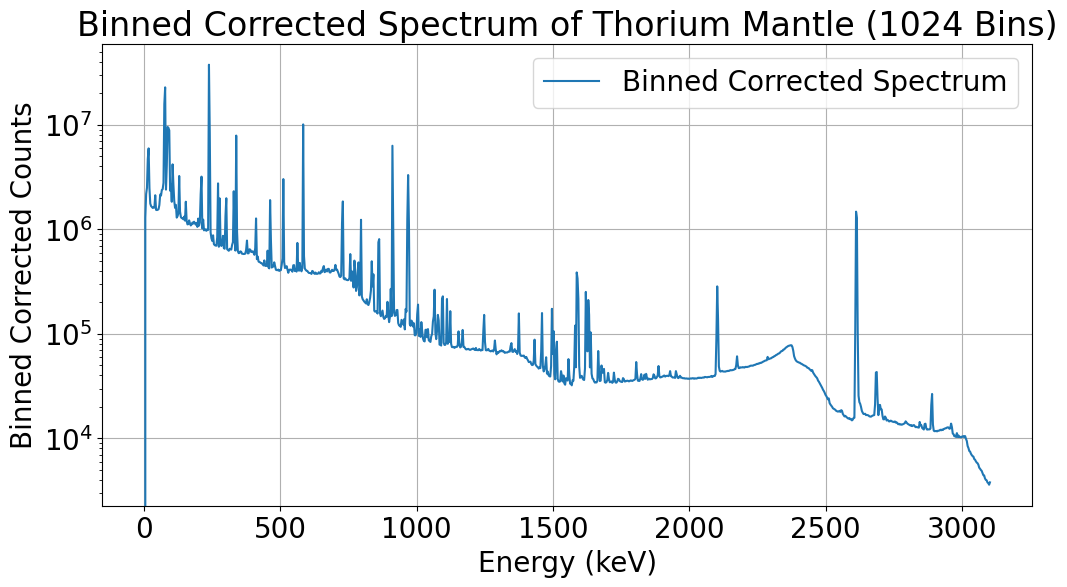

In [112]:

import numpy as np

# Define the number of bins
num_bins = 1024

# Bin the corrected counts
binned_counts, bin_edges = np.histogram(spectrum_data['Energy(keV)'], bins=num_bins, weights=spectrum_data['CorrectedCounts'])

# Calculate the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot the binned spectrum
plt.figure(figsize=(12, 6))
plt.plot(bin_centers, binned_counts, label='Binned Corrected Spectrum')
plt.xlabel('Energy (keV)')
plt.ylabel('Binned Corrected Counts')
plt.title('Binned Corrected Spectrum of Thorium Mantle (1024 Bins)')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()


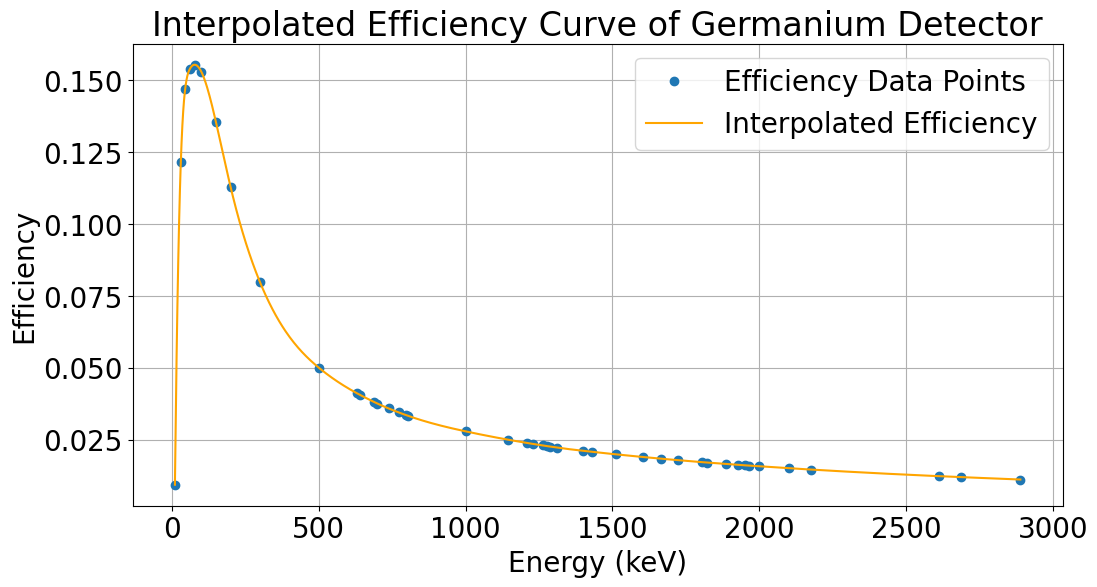

In [113]:

from scipy.interpolate import CubicSpline

# Load efficiency curve data
efficiency_data = pd.read_csv('eff.RPT')


# Perform cubic spline interpolation
cs = CubicSpline(efficiency_data['Energy'], efficiency_data['Efficiency'])

# Interpolate over a fine grid
energy_interpolated = np.linspace(efficiency_data['Energy'].min(), efficiency_data['Energy'].max(), num_bins)
efficiency_interpolated = cs(energy_interpolated)

# Plot the interpolated efficiency curve
plt.figure(figsize=(12, 6))
plt.plot(efficiency_data['Energy'], efficiency_data['Efficiency'], 'o', label='Efficiency Data Points')
plt.plot(energy_interpolated, efficiency_interpolated, label='Interpolated Efficiency', color='orange')
plt.xlabel('Energy (keV)')
plt.ylabel('Efficiency')
plt.title('Interpolated Efficiency Curve of Germanium Detector')
plt.legend()
plt.grid(True)
plt.show()


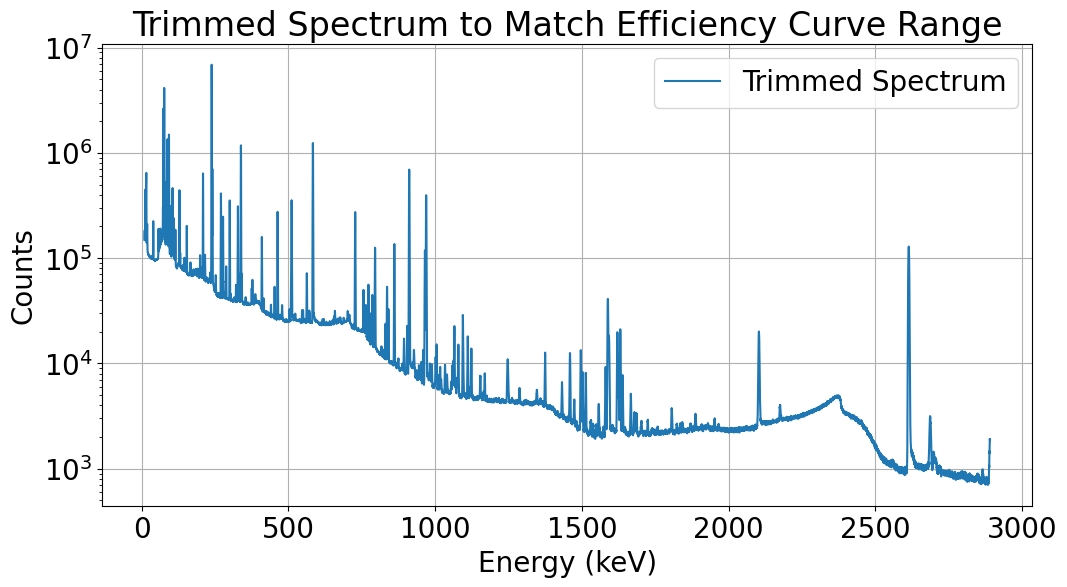

In [114]:

# Cut the spectrum to match the energy range of the efficiency curve
trimmed_spectrum = spectrum_data[(spectrum_data['Energy(keV)'] >= efficiency_data['Energy'].min()) &
                                 (spectrum_data['Energy(keV)'] <= efficiency_data['Energy'].max())]

# Bin the corrected counts
binned_counts, bin_edges = np.histogram(trimmed_spectrum['Energy(keV)'], bins=num_bins, weights=trimmed_spectrum['CorrectedCounts'])

# Calculate the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot the trimmed spectrum
plt.figure(figsize=(12, 6))
plt.plot(trimmed_spectrum['Energy(keV)'], trimmed_spectrum['CorrectedCounts'], label='Trimmed Spectrum')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.title('Trimmed Spectrum to Match Efficiency Curve Range')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()


In [115]:

# Correct for efficiency to obtain real counts emitted by the source
real_counts = trimmed_spectrum['CorrectedCounts'] / cs(trimmed_spectrum['Energy(keV)'])

# Sum total counts
total_counts = real_counts.sum()
print(f'Total counts in one whole day: {total_counts}')


Total counts in one whole day: 7257805787.793556


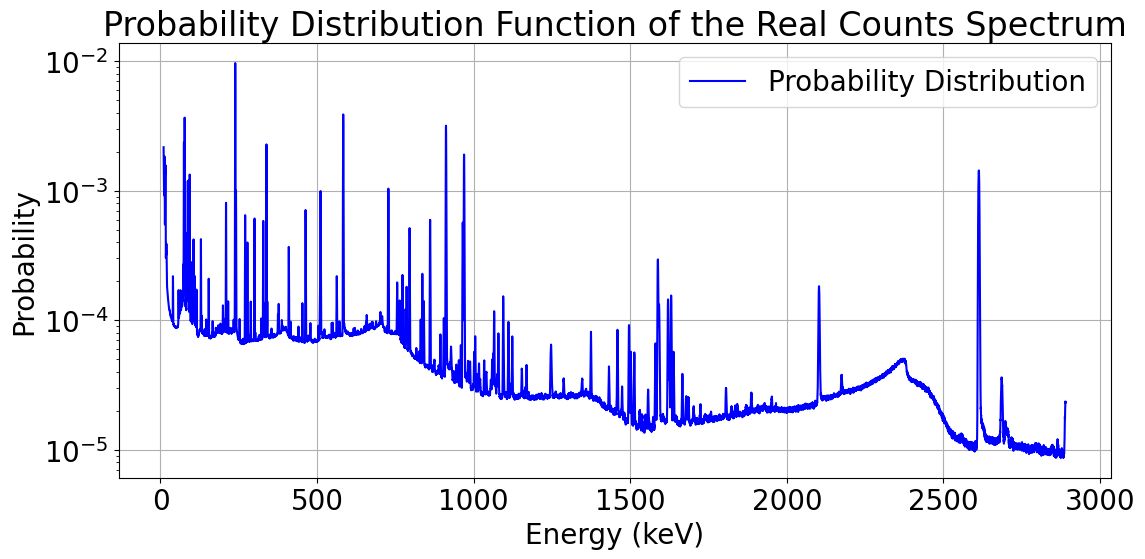

In [116]:
# Sum of the real counts to get the normalization factor
total_real_counts_sum = np.nansum(real_counts)

# Creating the probability distribution by dividing each count by the total counts
probability_distribution = real_counts / total_real_counts_sum

# Plotting the probability distribution function
plt.figure(figsize=(12, 6))
plt.plot(trimmed_spectrum['Energy(keV)'], probability_distribution, label='Probability Distribution', color='blue')
plt.xlabel('Energy (keV)')
plt.ylabel('Probability')
plt.title('Probability Distribution Function of the Real Counts Spectrum')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.yscale('log')
plt.show()

In [118]:
# # Convert energy from keV to MeV
# energy_MeV = bin_centers / 1000.0  # since 1 MeV = 1000 keV

# # Prepare the data for the txt file
# probability_data = pd.DataFrame({
#     'Energy_MeV': energy_MeV,
#     'Probability': probability_distribution
# })

# # Define the file path for the txt file
# txt_file_path = 'probability_distribution.csv'

# # Save the DataFrame to a txt file, with space as the delimiter
# probability_data.to_csv(txt_file_path, sep=',', index=False, header=False)

# # Return the path for download
# txt_file_path


In [119]:
import os
import pandas as pd

header      = ['EventID','TrackID','Particle','EnergyDeposited','XPosition','YPosition','ZPosition','LocalTime','Volume', 'Initial Energy', 'Origin Volume', 'MigrantID']
foldername  = 'sim_spectrum'
filenames   = os.listdir(foldername)

def loadfile(filename):
    df = pd.read_csv(os.path.join(foldername,filename),skiprows=16,names=header)
    df.insert(0, 'Filename', filename)
    return df

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


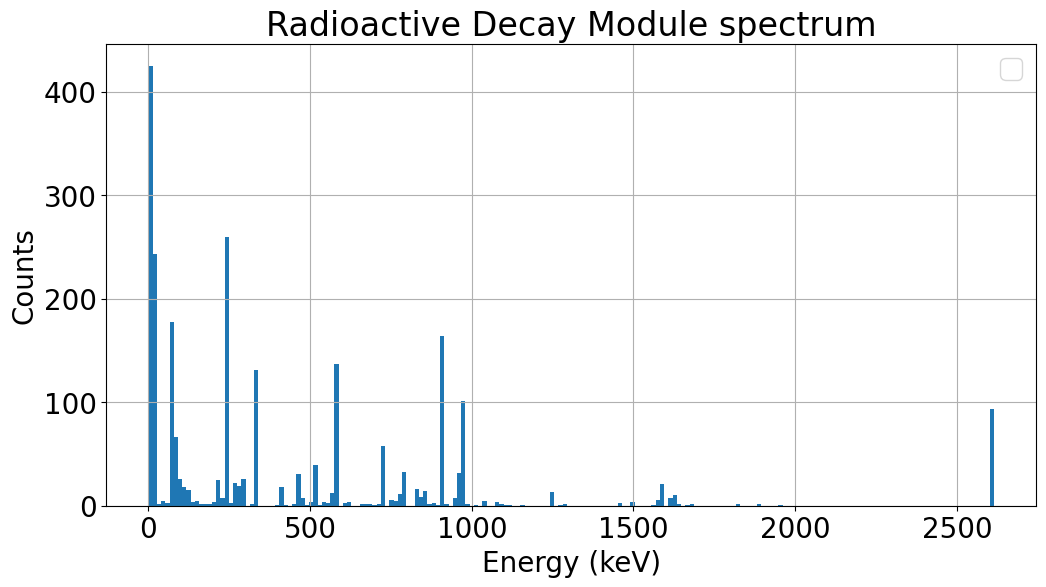

In [120]:
data = pd.concat([loadfile(filename) for filename in filenames])
data = data[data.Volume == 'logicThorium_PV']
gamma = data[data.Particle == 'gamma']

num_bins = 150

plt.figure(figsize=(12, 6))
plt.hist(gamma['Initial Energy'], bins=200)
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.title('Radioactive Decay Module spectrum')
plt.legend()
plt.grid(True)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (1024,) and (15196,)

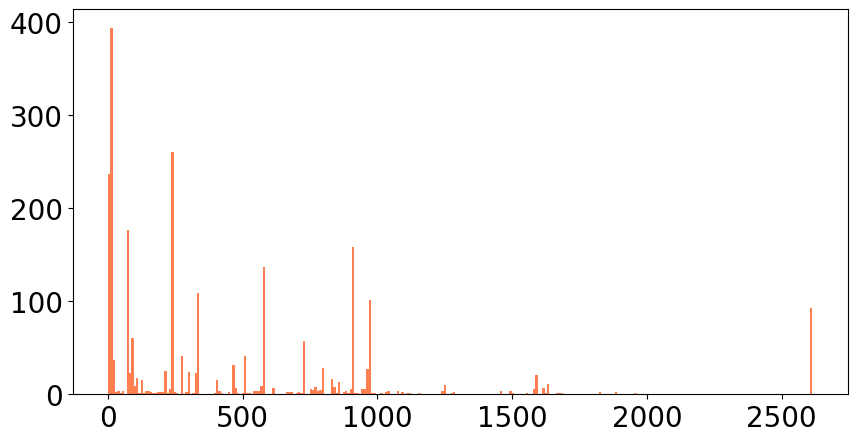

In [121]:
data = pd.concat([loadfile(filename) for filename in filenames])
data = data[data.Volume == 'logicThorium_PV']
gamma = data[data.Particle == 'gamma']


fig = plt.figure(figsize=(10, 5))
ax = plt.subplot()

ax.hist(gamma['Initial Energy'], bins=300, label='GEANT4 spectrum',color='coral')
ax.plot(bin_centers, probability_distribution*5600, '-', linewidth=1,alpha=0.6, label='HPGe spectrum',color='navy')

majorXticks = np.arange(0,3500,500)
minorXticks = np.arange(0,3000,100)
majorYticks = np.arange(0,450,50)
minorYticks = np.arange(0,400,10)

ax.set_xticks(majorXticks, minor=False)
ax.set_xticks(minorXticks, minor=True)
ax.set_yticks(majorYticks, minor=False)
ax.set_yticks(minorYticks, minor=True)

ax.tick_params()
ax.tick_params(direction = 'out', length = 10,labelsize = 14)
ax.tick_params(which='minor', direction = 'out', length = 4)

axtop = ax.twiny()
axtop.set_xticks(majorXticks, minor=False)
axtop.set_xticks(minorXticks, minor=True)
axtop.tick_params(direction = 'in', length = 10)
axtop.tick_params(which='minor', direction = 'in', length = 4)
axtop.set_xticklabels([])
ax.set_xlabel('Energy [keV]')
ax.set_ylabel('Counts')
# plt.title('Normalized spectra comparison')
ax.legend(bbox_to_anchor = (0.95,0.85), fontsize = 14)
ax.grid(False)
# plt.yscale('log')
# plt.xscale('log')
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_ylim(1,)
# ax.set_xlim(20,)
plt.show()

<Figure size 640x480 with 0 Axes>

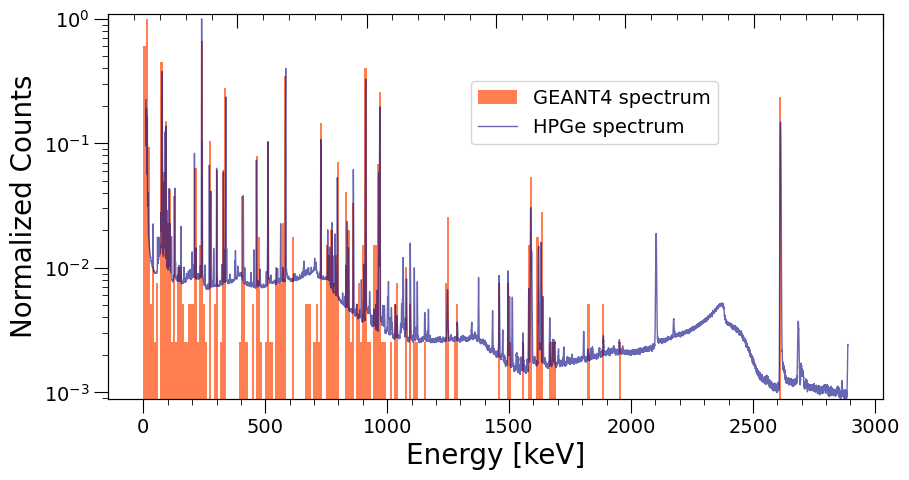

In [122]:
# Assuming you have already defined 'loadfile', 'filenames', 'bin_centers', and 'probability_distribution' correctly.
plt.clf()

data = pd.concat([loadfile(filename) for filename in filenames])
data = data[data.Volume == 'logicThorium_PV']
gamma = data[data.Particle == 'gamma']

fig = plt.figure(figsize=(10, 5))
ax = plt.subplot()

# Calculate histogram and get the heights and bin edges
counts, bin_edges, _ = ax.hist(gamma['Initial Energy'], bins=300, label='GEANT4 spectrum', color='coral')

# Maximum count for scaling
max_count = np.max(counts)

# Normalize the histogram by setting weights
weights = np.ones_like(gamma['Initial Energy']) / max_count
ax.clear()  # Clear to redraw properly
ax.hist(gamma['Initial Energy'], bins=300, weights=weights, label='GEANT4 spectrum', color='coral')

# Assuming the HPGe spectrum needs scaling
hpge_max = np.max(probability_distribution)
hpge_min = np.min(probability_distribution)
scale_factor = 1 / hpge_max
ax.plot(trimmed_spectrum['Energy(keV)'], probability_distribution * scale_factor, '-', linewidth=1, alpha=0.6, label='HPGe spectrum', color='navy')

# Set ticks
majorXticks = np.arange(0, 3500, 500)
minorXticks = np.arange(0, 3000, 100)
majorYticks = np.arange(0, 1.1, 0.1)
minorYticks = np.arange(0, 1, 0.01)

ax.set_xticks(majorXticks, minor=False)
ax.set_xticks(minorXticks, minor=True)
ax.set_yticks(majorYticks, minor=False)
ax.set_yticks(minorYticks, minor=True)

ax.tick_params(direction='out', length=10, labelsize=14)
ax.tick_params(which='minor', direction='out', length=4)

axtop = ax.twiny()
axtop.set_xticks(majorXticks, minor=False)
axtop.set_xticks(minorXticks, minor=True)
axtop.tick_params(direction='in', length=10)
axtop.tick_params(which='minor', direction='in', length=4)
axtop.set_xticklabels([])

ax.set_xlabel('Energy [keV]')
ax.set_ylabel('Normalized Counts')
ax.legend(bbox_to_anchor=(0.80, 0.85), fontsize=14)
ax.grid(False)
ax.set_yscale('log')
ax.set_ylim(hpge_min/hpge_max, 1.1)  # Adjusted to show normalized scale clearly

plt.show()
